<a href="https://colab.research.google.com/github/dantecomedia/GAN/blob/master/google_landmark_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [73]:
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

In [76]:
import sys, requests, shutil, os
data=pd.read_csv('/content/gdrive/My Drive/google landmark/train.csv')
test_data = pd.read_csv('/content/gdrive/My Drive/google landmark/test.csv')
data.head(5)


,id,url,landmark_id
0,97c0a12e07ae8dd5,http://lh4.ggpht.com/-f8xYA5l4apw/RSziSQVaABI/...,6347
1,650c989dd3493748,https://lh5.googleusercontent.com/-PUnMrX7oOyA...,12519
2,05e63ca9b2cde1f4,http://mw2.google.com/mw-panoramio/photos/medi...,264
3,08672eddcb2b7c93,http://lh3.ggpht.com/-9fgSxDYwhHA/SMvGEoltKTI/...,13287
4,fc49cb32ef7f1e89,http://lh6.ggpht.com/-UGAXxvPbr98/S-jGZbyMIPI/...,4018


In [0]:
test_data.head(5)

,id,url
0,cb9998b8cdaf6235,https://lh3.googleusercontent.com/-q8B91vDIQZY...
1,30728cf6e50a6bc6,https://lh3.googleusercontent.com/-91gJSKTgv5Q...
2,16afbc86b710337d,https://lh3.googleusercontent.com/-GHZdXuf2wMg...
3,d29b2166cf522450,https://lh3.googleusercontent.com/-cWDnYNQhyws...
4,dd5c03b20c21cfba,https://lh3.googleusercontent.com/-PSLN6BloM-k...


In [0]:
from

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2


from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.layers import MaxPooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.layers import BatchNormalization
from skimage import data, io, filters
from skimage import data
from skimage.color import rgb2gray
import cv2


from skimage import data
from skimage.color import rgb2hsv

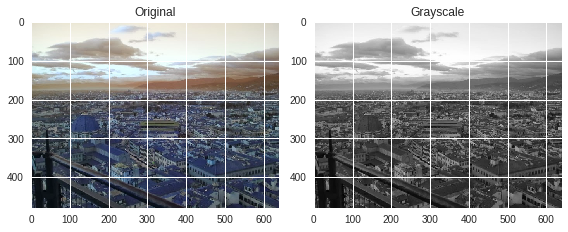

In [94]:
original = cv2.imread("/content/gdrive/My Drive/landmark dataset/train/florence/2013-12-27 16.32.15.jpg")
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

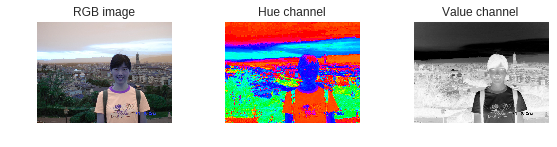

In [100]:
rgb_img = cv2.imread("/content/gdrive/My Drive/landmark dataset/train/florence/DSC01217.JPG")
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

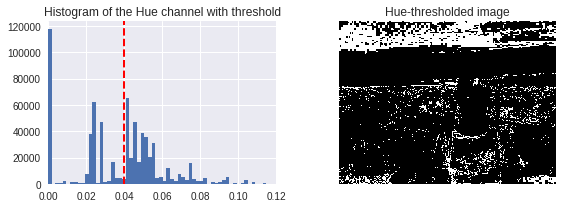

In [101]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

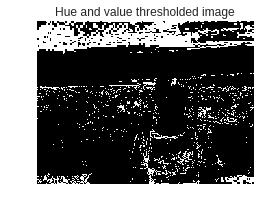

In [102]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show()

In [0]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

Text(0.5, 1.0, 'Sobel filter computed\n on (V)alue converted image (HSV)')

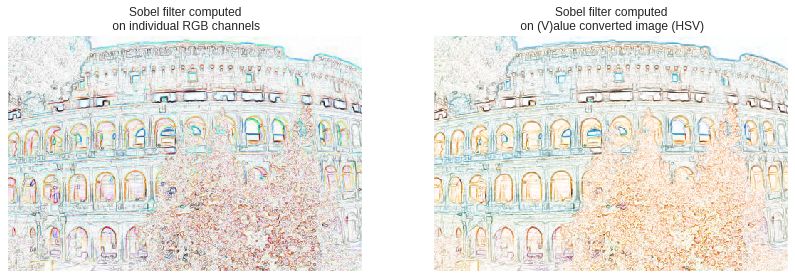

In [106]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters

from skimage import data
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

image = cv2.imread("/content/gdrive/My Drive/landmark dataset/train/colossum/22191167.jpg")

fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_each.imshow(rescale_intensity(1 - sobel_each(image)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")

# We use 1 - sobel_hsv(image) but this won't work if image is not normalized
ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(image)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on (V)alue converted image (HSV)")

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


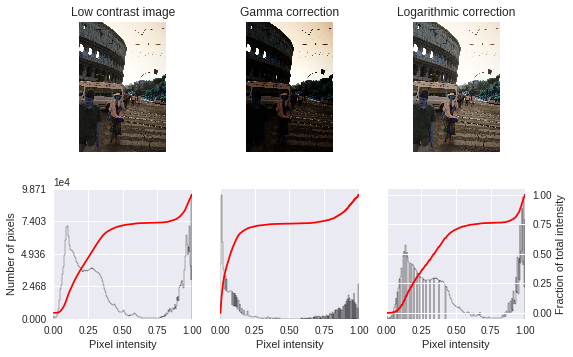

In [107]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = cv2.imread("/content/gdrive/My Drive/landmark dataset/train/colossum/DSC06411.JPG")

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [81]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



test_set= test_datagen.flow_from_directory(
        '/content/gdrive/My Drive/landmark dataset/test',
        target_size=(75, 75),
        batch_size=32,
        class_mode='categorical')
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/landmark dataset/train',
        target_size=(75, 75),
        batch_size=32,
        class_mode='categorical')


Found 76 images belonging to 11 classes.
Found 566 images belonging to 11 classes.


In [82]:

model = Sequential()

model.add( Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (75, 75, 3)) )
model.add( MaxPooling2D(pool_size = (3, 3), strides = (2, 2)) )
model.add( Conv2D(32, kernel_size = (3, 3), activation = 'relu') )
model.add( MaxPooling2D(pool_size = (2, 2), strides = (2, 2)) )
model.add( Flatten() )
model.add( Dense(128, activation = 'relu') )
model.add( Dense(11, activation = 'softmax') )

model.compile( loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 9248)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               1183872   
_________________________________________________________________
dense_29 (Dense)             (None, 11)                1419      
Total para

In [86]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=16,
        validation_data=test_set,
        nb_val_samples=8,
        epochs=50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=16, validation_data=<keras_pre..., epochs=50, validation_steps=8)`
  


Epoch 1/50
16/16 [==============================] - 14s 875ms/step - loss: 0.0499 - acc: 0.9863 - val_loss: 0.9211 - val_acc: 0.8571
Epoch 2/50
16/16 [==============================] - 14s 845ms/step - loss: 0.0382 - acc: 0.9941 - val_loss: 0.8083 - val_acc: 0.8827
Epoch 3/50
16/16 [==============================] - 14s 866ms/step - loss: 0.0378 - acc: 0.9902 - val_loss: 0.8278 - val_acc: 0.8796
Epoch 4/50
16/16 [==============================] - 13s 839ms/step - loss: 0.0330 - acc: 0.9941 - val_loss: 0.7850 - val_acc: 0.8878
Epoch 5/50
16/16 [==============================] - 13s 831ms/step - loss: 0.0365 - acc: 0.9922 - val_loss: 1.0228 - val_acc: 0.8776
Epoch 6/50
16/16 [==============================] - 14s 889ms/step - loss: 0.0277 - acc: 0.9941 - val_loss: 0.9633 - val_acc: 0.8241
Epoch 7/50
16/16 [==============================] - 13s 835ms/step - loss: 0.0540 - acc: 0.9855 - val_loss: 0.9722 - val_acc: 0.8571
Epoch 8/50
16/16 [==============================] - 13s 828ms/step - 

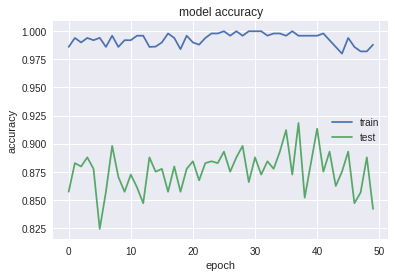

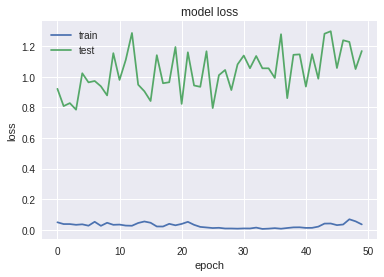

In [89]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()